In [ ]:
from google.colab import files
f = files.upload()

Saving query_result_2022-11-22T15_09_55.099765+05_30.csv to query_result_2022-11-22T15_09_55.099765+05_30.csv


In [ ]:
import pandas as pd
raw_data = pd.read_csv("query_result_2022-11-22T15_09_55.099765+05_30.csv")

In [ ]:
raw_data

,contest,player,times_played,player_rank
0,48,1138349,1,26
1,48,1561694,1,26
2,48,1013284,8,25
3,48,2043361,2,24
4,48,985507,19,23
...,...,...,...,...
10719,1,1473620,1,14
10720,1,1328006,1,14
10721,1,1463698,1,14
10722,1,1054519,1,14


In [ ]:
#initializing ratings and volatality for all players
dic = {}
for i in raw_data['player']:
  dic[i] = [1500, 125]

In [ ]:
dic

{1138349: [1500, 125],
 1561694: [1500, 125],
 1013284: [1500, 125],
 2043361: [1500, 125],
 985507: [1500, 125],
 1941878: [1500, 125],
 1628340: [1500, 125],
 2026177: [1500, 125],
 1255498: [1500, 125],
 2775626: [1500, 125],
 1546812: [1500, 125],
 235439: [1500, 125],
 1137052: [1500, 125],
 347227: [1500, 125],
 1181715: [1500, 125],
 2897101: [1500, 125],
 1266704: [1500, 125],
 2212781: [1500, 125],
 2372992: [1500, 125],
 1181378: [1500, 125],
 1835383: [1500, 125],
 1072241: [1500, 125],
 1124261: [1500, 125],
 1648822: [1500, 125],
 1218506: [1500, 125],
 2081011: [1500, 125],
 1283115: [1500, 125],
 2307407: [1500, 125],
 2927451: [1500, 125],
 2360807: [1500, 125],
 950621: [1500, 125],
 1136448: [1500, 125],
 2800361: [1500, 125],
 2360805: [1500, 125],
 1570836: [1500, 125],
 1440368: [1500, 125],
 2197490: [1500, 125],
 560093: [1500, 125],
 1390071: [1500, 125],
 2056555: [1500, 125],
 1169326: [1500, 125],
 1848491: [1500, 125],
 1158761: [1500, 125],
 1595643: [1500,

In [ ]:
players = []
ranks = []
games = []

for i in range(len(raw_data)):
  row = raw_data.iloc[i, :]
  players.append({row[0]: row[1]})
  games.append({row[0]: row[2]})
  ranks.append({row[0]: row[3]})

In [ ]:
player = [[] for x in range(49)]
for i in range(len(players)):
  for k, v in players[i].items():
    player[k].append(v)


In [ ]:
rank = [[] for x in range(49)]
for i in range(len(ranks)):
  for k, v in ranks[i].items():
    rank[k].append(v)

In [ ]:
game = [[] for x in range(49)]
for i in range(len(games)):
  for k, v in games[i].items():
    game[k].append(v)

In [ ]:
import math

In [ ]:
#sum of ratings contest wise to find r_avg
def contest_sum_rating(i, n, current_players):
  sum = 0
  for j in range(n):
    sum += dic[current_players[j]][0]
  return round(sum, 10)

In [ ]:
#competiton factor for each contest
def competition_factor(i,n, current_players):
  term1 = 0
  term2 = 0
  ravg = round((contest_sum_rating(i,n,current_players) / n), 10)
  for j in range(n):
    player_j = current_players[j]
    rating_j = dic[player_j][0]
    vol_j = dic[player_j][1]
    term1 += round(pow(vol_j,2),10)
    term2 += round(pow(rating_j - ravg, 2),10)
  cf = math.sqrt(round((term1/n),10) + round((term2/(n-1)), 10))
  return round(cf, 10)

In [ ]:
def calc_expected_rank(i, n, current_players):
  dic2 = {}
  for j in range(n):
    player_j = current_players[j]
    rank_j = current_ranks[j]
    rating_j = dic[player_j][0]
    vol_j = dic[player_j][1]
    expected_rank_j = 0
    for k in range(n):
      player_k = current_players[k]
      rank_k = current_ranks[k]
      rating_k = dic[player_k][0]
      vol_k = dic[player_k][1]
      if(k == j):
        continue
      power = round((rating_j - rating_k),10) / round(math.sqrt(round(pow(vol_j,2),10) + round(pow(vol_k,2), 10)), 10)
      ekj = 1/ (1 + pow(4, round(power,10)))
      expected_rank_j += round(ekj,10)
    dic2[player_j] = round(expected_rank_j, 10)
  return dic2

In [ ]:
player_list = []
contest = []
comp_fac = []
actual_rank = []
exp_rank = []
game_no = []
rating_before = []
rating_after = []
vol_before = []
vol_after = []
actual_perf = []
exp_perf = []
rating_wt = []
vol_wt = []

In [ ]:
for i in range(1,49):
  current_players = player[i]
  current_ranks = rank[i]
  current_games = game[i]
  n = len(current_players)
  cf = competition_factor(i,n,current_players) #calculating competition factor for current contest
  e_rank_dic = calc_expected_rank(i, n, current_players) #calculating expected rank for each player in the current contest

  for j in range(n):
    player_j = current_players[j]
    rank_j = current_ranks[j]
    rating_j = dic[player_j][0]
    vol_j = dic[player_j][1]
    expected_rank_j = e_rank_dic[player_j]

    #compare expected vs actual rank
    #caculate expected and actual perf
    a_perf = round(math.log(round((n/(rank_j)), 10)) / math.log(4), 10)
    e_perf =  round(math.log(round((n/expected_rank_j), 10)) / math.log(4), 10)
    
    #calculate vol wt and rating wt
    games_played = current_games[j]
    rw_j = round((0.4*games_played + 0.2), 10) / round((0.7*games_played + 0.6), 10)
    vw_j = round((0.5*games_played + 0.8), 10) / round((games_played + 0.6), 10)


    #calculate new rating and volatality
    new_rating = rating_j + round((a_perf - e_perf), 10)* round(rw_j, 10)* round(cf, 10)
    new_vol = math.sqrt( round((vw_j*pow(new_rating - rating_j, 2) + pow(vol_j, 2)), 10) / round((vw_j + 1.1), 10) )

    #do some capping----> to do....
    rc = 100 + round((75 / (games_played + 1)), 10) + round((100*500 / (abs(rating_j - 1000) + 500)), 10)

    if(new_rating - rating_j > 0 and new_rating - rating_j > rc):
      new_rating = rating_j+ round(rc, 10)
    if(new_rating - rating_j < 0 and abs(new_rating-rating_j) > rc):
      new_rating = rating_j - round(rc, 10)

    #update rating and vol
    dic[player_j][0] = round(new_rating,10)
    dic[player_j][1] = round(new_vol, 10)


    player_list.append(player_j)
    contest.append(i)
    comp_fac.append(cf)
    actual_rank.append(rank_j)
    exp_rank.append(expected_rank_j)
    game_no.append(games_played)
    rating_before.append(rating_j)
    rating_after.append(new_rating)
    vol_before.append(vol_j)
    vol_after.append(new_vol)
    actual_perf.append(a_perf)
    exp_perf.append(e_perf)
    rating_wt.append(rw_j)
    vol_wt.append(vw_j)



    # print(player_j, " ", rank_j, " ", expected_rank_j, " ", a_perf, " ", e_perf, " ",  rating_j, " ", new_rating, " ", new_vol, " ", cf)


In [ ]:
df = pd.DataFrame([contest, player_list, game_no, comp_fac, actual_rank, exp_rank, actual_perf, exp_perf, rating_before, rating_after, rating_wt, vol_before, vol_after, vol_wt]
                  , index = ['contest_no', 'players', 'game_no', 'cf', 'a_rank', 'e_rank', 'a_perf', 'e_perf', 'rating_b', 'new_rating', 'rwt', 'vol_b', 'new_vol', 'vwt']).T

In [ ]:
df

,contest_no,players,game_no,cf,a_rank,e_rank,a_perf,e_perf,rating_b,new_rating,rwt,vol_b,new_vol,vwt
0,1.0,375877.0,1.0,125.000000,1.0,9.500000,2.160964,0.537000,1500.000000,1593.690217,0.461538,125.000000,109.082948,0.812500
1,1.0,1531560.0,1.0,125.000000,2.0,9.500000,1.660964,0.537000,1500.000000,1564.844063,0.461538,125.000000,99.781097,0.812500
2,1.0,1210832.0,1.0,125.000000,3.0,9.500000,1.368483,0.537000,1500.000000,1547.970145,0.461538,125.000000,95.642778,0.812500
3,1.0,1347208.0,1.0,125.000000,4.0,9.500000,1.160964,0.537000,1500.000000,1535.997909,0.461538,125.000000,93.383397,0.812500
4,1.0,478099.0,1.0,125.000000,5.0,9.500000,1.000000,0.537000,1500.000000,1526.711522,0.461538,125.000000,92.049214,0.812500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10719,48.0,396733.0,16.0,636.368738,29.0,17.320386,0.675736,1.047527,2663.095102,2535.568311,0.559322,190.931375,167.505974,0.530120
10720,48.0,1693496.0,1.0,636.368738,29.0,57.500313,0.675736,0.181978,1500.000000,1645.021128,0.461538,125.000000,130.785043,0.812500
10721,48.0,1727240.0,1.0,636.368738,29.0,57.500313,0.675736,0.181978,1500.000000,1645.021128,0.461538,125.000000,130.785043,0.812500
10722,48.0,2064626.0,1.0,636.368738,28.0,57.500313,0.701049,0.181978,1500.000000,1652.455786,0.461538,125.000000,134.329120,0.812500


In [ ]:
df.to_csv('contest_wise_results.csv')

In [ ]:
a = []
b = []
for k,v in dic.items():
  a.append(k)
  b.append(v[0])
d = pd.DataFrame([a,b], index = ['player', 'rating']).T
d.to_csv('final_result.csv')

In [ ]:
max = -1
count = 0
for k,v in dic.items():
  if v[0] > max:
    max = v[0]
  count += 1

In [ ]:
print(max, " ", count)#maximum rating and number of players 

3544.5349162358   5400


In [ ]:
d = {}
for i in range(len(contest)):
  d[contest[i]] = comp_fac[i]
d

{1: 125.0,
 2: 123.6953610621,
 3: 128.3890165901,
 4: 114.0405863688,
 5: 125.9484800655,
 6: 124.7760402303,
 7: 123.3490711527,
 8: 129.812948237,
 9: 132.1233429236,
 10: 132.5442223925,
 11: 132.947160226,
 12: 137.1474567095,
 13: 138.0357771416,
 14: 148.1225966639,
 15: 158.0963609106,
 16: 151.0926693634,
 17: 149.6588759491,
 18: 165.848342533,
 19: 168.0391335822,
 20: 185.7071914209,
 21: 187.054253645,
 22: 220.114606027,
 23: 193.8845027818,
 24: 209.3116909047,
 25: 214.9656062764,
 26: 231.5673274704,
 27: 255.3550198512,
 28: 286.8285200787,
 29: 304.3817056766}

In [ ]:
a = []
b = []
for k,v in d.items():
  a.append(k)
  b.append(v)

In [ ]:
len(contest)

6715

In [ ]:
d = {}
max = -1
prev_contest = 0
for i in range(len(contest)):
  if contest[i] > prev_contest:
    max = -1
    prev_contest = contest[i]
  diff = rating_after[i] #- rating_before[i]
  if diff > max:
    max = diff
    d[contest[i]] = max
d

{1: 1593.6902167248847,
 2: 1740.2872650605952,
 3: 1738.8963026825832,
 4: 1566.593805099026,
 5: 1690.164340761094,
 6: 1740.4270448245793,
 7: 1846.737797157259,
 8: 1785.1311858040888,
 9: 1891.2393956548995,
 10: 1901.274235348297,
 11: 1942.287818431776,
 12: 1951.1478444869435,
 13: 1987.4624066466783,
 14: 2073.233864802003,
 15: 2147.15492443662,
 16: 2008.4662193904,
 17: 2030.7820716200538,
 18: 2155.7697371044956,
 19: 2033.0407485135424,
 20: 2215.811049622373,
 21: 2318.839610180929,
 22: 2183.0162223534,
 23: 2144.101193318162,
 24: 2219.8238058496154,
 25: 2345.1031023755,
 26: 2320.2247892323,
 27: 2430.3930708534513,
 28: 2488.5329061349303,
 29: 2542.2609970812996,
 30: 2674.2436660798003,
 31: 2804.0583504428,
 32: 2719.8142183969,
 33: 2737.9528107703,
 34: 2864.9821580868997,
 35: 2990.5357313384,
 36: 2876.9627138214,
 37: 3003.7671925182,
 38: 3129.0942431803996,
 39: 3091.9834683577,
 40: 3253.112199699,
 41: 3240.3413908774164,
 42: 3363.5872927079,
 43: 3375.

2   1740.2872650605952   1593.6902167248847   146.5970483357105
3   1738.8963026825832   1740.2872650605952   -1.390962378012091
4   1566.593805099026   1738.8963026825832   -172.30249758355717
5   1690.164340761094   1566.593805099026   123.5705356620681
6   1740.4270448245793   1690.164340761094   50.26270406348522
7   1846.737797157259   1740.4270448245793   106.31075233267961
8   1785.1311858040888   1846.737797157259   -61.60661135317014
9   1891.2393956548995   1785.1311858040888   106.10820985081068
10   1901.274235348297   1891.2393956548995   10.034839693397544
11   1942.287818431776   1901.274235348297   41.013583083479034
12   1951.1478444869435   1942.287818431776   8.86002605516751
13   1987.4624066466783   1951.1478444869435   36.314562159734805
14   2073.233864802003   1987.4624066466783   85.77145815532481
15   2147.15492443662   2073.233864802003   73.921059634617
16   2008.4662193904   2147.15492443662   -138.6887050462201
17   2030.7820716200538   2008.4662193904   2

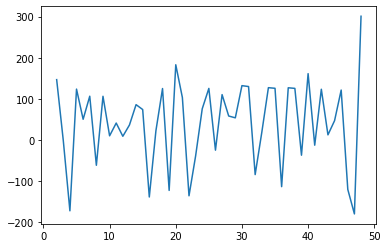

In [ ]:
import matplotlib.pyplot as plt
l1 = []
l2 = []
for i in range(1,len(d)):
  l1.append(i+1)
  l2.append(d[i+1] - d[i])
  print(i+1, " ", d[i+1], " ", d[i], " ", d[i+1] - d[i])
plt.plot(l1, l2)

In [ ]:
df.iloc[9:]

,contest_no,players,game_no,cf,a_rank,e_rank,a_perf,e_perf,rating_b,new_rating,rwt,vol_b,new_vol,vwt
9,1.0,1254043.0,1.0,125.000000,10.0,9.50000,0.500000,0.537000,1500.0,1497.865368,0.461538,125.0,90.398399,0.8125
10,1.0,683206.0,1.0,125.000000,11.0,9.50000,0.431248,0.537000,1500.0,1493.898920,0.461538,125.0,90.475126,0.8125
11,1.0,135504.0,1.0,125.000000,12.0,9.50000,0.368483,0.537000,1500.0,1490.277837,0.461538,125.0,90.609549,0.8125
12,1.0,512773.0,1.0,125.000000,13.0,9.50000,0.310744,0.537000,1500.0,1486.946763,0.461538,125.0,90.787231,0.8125
13,1.0,1463698.0,1.0,125.000000,14.0,9.50000,0.257287,0.537000,1500.0,1483.862671,0.461538,125.0,90.997625,0.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,29.0,2067062.0,1.0,304.381706,94.0,254.77742,0.952421,0.233169,1500.0,1601.043354,0.461538,125.0,111.836551,0.8125
6711,29.0,2244313.0,1.0,304.381706,94.0,254.77742,0.952421,0.233169,1500.0,1601.043354,0.461538,125.0,111.836551,0.8125
6712,29.0,573271.0,1.0,304.381706,94.0,254.77742,0.952421,0.233169,1500.0,1601.043354,0.461538,125.0,111.836551,0.8125
6713,29.0,1131541.0,1.0,304.381706,94.0,254.77742,0.952421,0.233169,1500.0,1601.043354,0.461538,125.0,111.836551,0.8125
